In [4]:
# Core analysis packages
import numpy as np
import os, sys
import pandas as pd
from scipy import stats
from scipy.special import comb
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats import anova
import bff
from sklearn.preprocessing import StandardScaler

# Plotting packages
import matplotlib.pyplot as plt
plt.rcdefaults()
import seaborn as sns 
from adjustText import adjust_text # For nonoverlapping text labels on plots
sns.set(style="ticks", color_codes=True)
sns.set_style("white")
sns.set_style({'xtick.bottom': True, 'ytick.left': True})
colorref = ["gray", "royalblue", "crimson", "goldenrod", "mediumorchid", "seagreen"]

# iPython magic commands
%matplotlib notebook
%load_ext autoreload
%autoreload 2
%autosave 30

SMALL_SIZE = 12
MEDIUM_SIZE = 12
BIG_SIZE = 14

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIG_SIZE)  # fontsize of the figure title
cust_palette = sns.color_palette("Paired")[6:10]
cust_palette = [cust_palette[i] for i in [1,0,3,2]]

def median_split(S):
    return S > S.median()

Autosaving every 30 seconds


In [16]:
# Load file (from same directory as the notebook)
df = pd.read_csv("Study1.csv")
df.head()

,ID,term,country,actRating,emoRating,epi,GDP,perception,CRI
0,1,change,NLD,-0.502012,-0.473881,-1.251694,-0.068996,-1.269116,67.17
1,1,change,PAK,-0.321146,-0.311418,1.579630,NaN,-0.879814,87.83
2,1,change,RUS,-0.411579,-0.473881,0.412212,0.149813,-1.236344,75.50
3,1,change,SWE,-0.321146,-0.311418,-1.479810,-0.183328,-1.248157,89.00
4,1,change,UAE,-0.321146,-0.311418,0.070038,-0.235361,NaN,125.00


In [17]:
# Group and average data within participant and PE bin
AVDATA = df.groupby(["country"], as_index=False).mean()
AVDATA

,country,ID,actRating,emoRating,epi,GDP,perception,CRI
0,ARG,187.440000,0.031692,0.188448,0.298154,-0.194761,1.151602,48.33
1,AUS,192.790323,0.047752,0.117799,-1.224857,0.113114,-0.077962,49.50
2,AZR,196.948905,0.006393,-0.107733,0.680584,-0.350155,NaN,125.00
3,BEL,198.638889,-0.013288,-0.000580,-1.117508,-0.194328,-0.501301,81.83
4,BGR,192.968992,-0.083523,-0.089385,-0.023892,-0.351551,NaN,101.00
5,BLR,192.939394,0.009256,-0.070872,0.244480,-0.348164,-0.836579,111.83
6,BRA,186.354331,-0.135939,-0.049892,0.365247,0.220832,1.326308,82.83
7,CAN,199.189394,0.180092,0.147447,-0.963194,0.251308,0.010393,21.83
8,CHL,204.495726,-0.023896,-0.104698,0.090166,-0.276127,1.351414,81.17
9,COL,197.829060,0.027937,0.087407,0.251189,-0.260548,1.381095,61.00


<IPython.core.display.Javascript object>


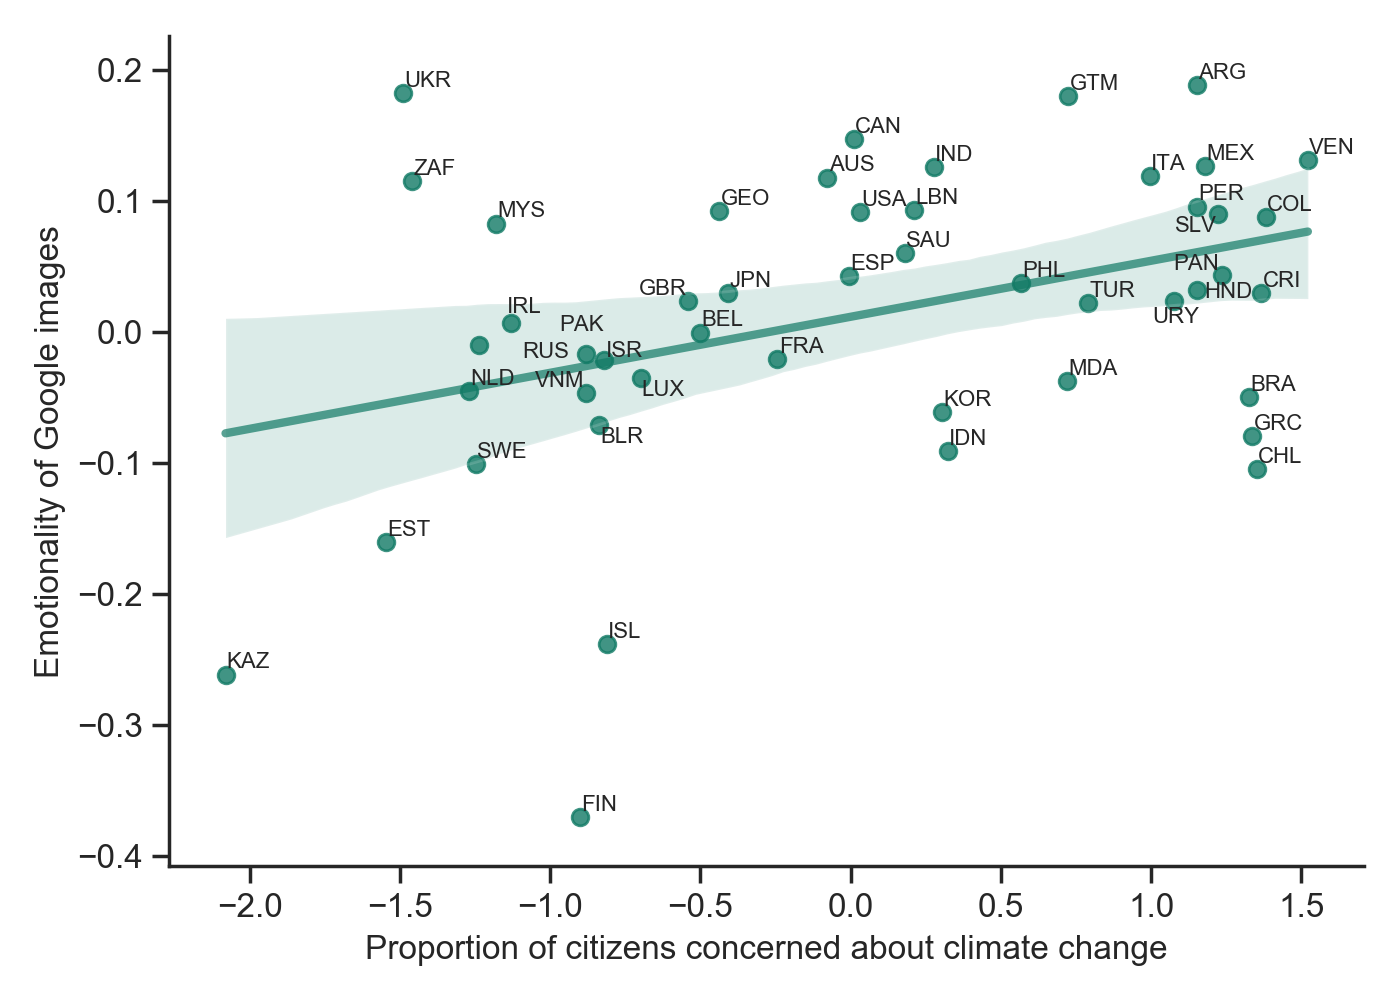

/opt/anaconda3/envs/research/lib/python3.6/site-packages/adjustText/__init__.py:31: RuntimeWarning: invalid value encountered in less
  x_in = np.logical_and(x>x1, x<x2)
/opt/anaconda3/envs/research/lib/python3.6/site-packages/adjustText/__init__.py:31: RuntimeWarning: invalid value encountered in greater
  x_in = np.logical_and(x>x1, x<x2)
/opt/anaconda3/envs/research/lib/python3.6/site-packages/adjustText/__init__.py:32: RuntimeWarning: invalid value encountered in less
  y_in = np.logical_and(y>y1, y<y2)
/opt/anaconda3/envs/research/lib/python3.6/site-packages/adjustText/__init__.py:32: RuntimeWarning: invalid value encountered in greater
  y_in = np.logical_and(y>y1, y<y2)


In [4]:
fig, ax = plt.subplots(1,1, figsize=(7,5))

sns.regplot(x=AVDATA.perception, y=AVDATA.emoRating, scatter_kws={"color": "#117A65"}, \
            line_kws={"color":"#117A65","alpha":0.7,"lw":3}, ax=ax)
X = AVDATA.perception
Y = AVDATA.emoRating
T = AVDATA.country
texthandles = [plt.text(X[i], Y[i], T[i], ha='center', va='center', fontsize=8) for i in range(AVDATA.shape[0])]
adjust_text(texthandles)
ax.set_ylabel('Emotionality of Google images')
ax.set(xlabel='Proportion of citizens concerned about climate change')
sns.despine()
plt.tight_layout()

<IPython.core.display.Javascript object>


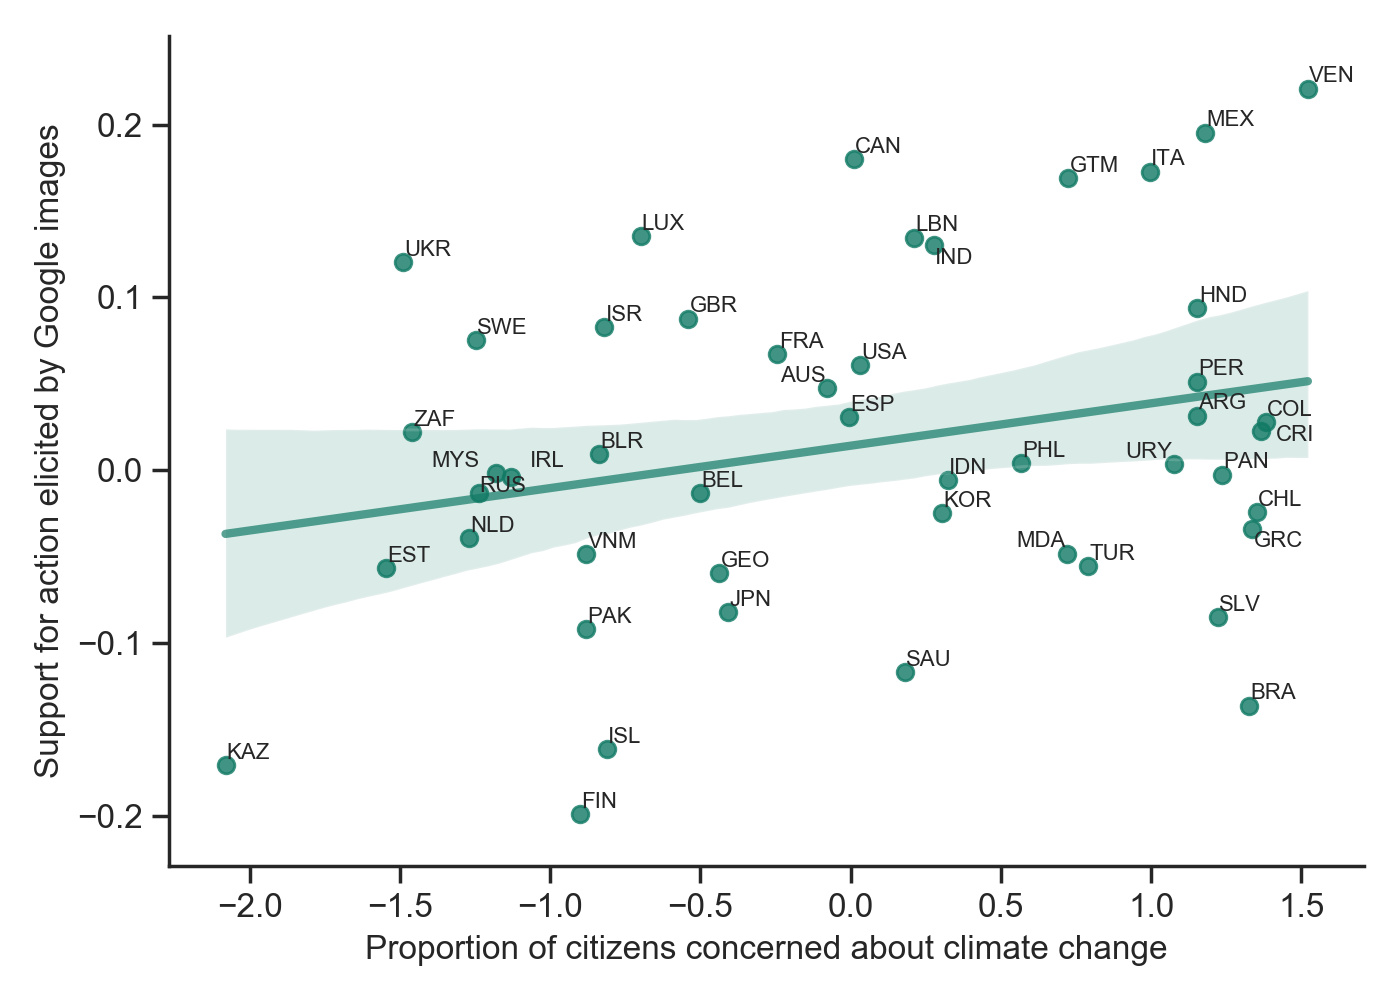

/opt/anaconda3/envs/research/lib/python3.6/site-packages/adjustText/__init__.py:31: RuntimeWarning: invalid value encountered in less
  x_in = np.logical_and(x>x1, x<x2)
/opt/anaconda3/envs/research/lib/python3.6/site-packages/adjustText/__init__.py:31: RuntimeWarning: invalid value encountered in greater
  x_in = np.logical_and(x>x1, x<x2)
/opt/anaconda3/envs/research/lib/python3.6/site-packages/adjustText/__init__.py:32: RuntimeWarning: invalid value encountered in less
  y_in = np.logical_and(y>y1, y<y2)
/opt/anaconda3/envs/research/lib/python3.6/site-packages/adjustText/__init__.py:32: RuntimeWarning: invalid value encountered in greater
  y_in = np.logical_and(y>y1, y<y2)


In [5]:
fig, ax = plt.subplots(1,1, figsize=(7,5))

sns.regplot(x=AVDATA.perception, y=AVDATA.actRating, scatter_kws={"color": "#117A65"}, \
            line_kws={"color":"#117A65","alpha":0.7,"lw":3}, ax=ax)
X = AVDATA.perception
Y = AVDATA.actRating
T = AVDATA.country
texthandles = [plt.text(X[i], Y[i], T[i], ha='center', va='center', fontsize=8) for i in range(AVDATA.shape[0])]
adjust_text(texthandles)
ax.set_ylabel('Support for action elicited by Google images')
ax.set(xlabel='Proportion of citizens concerned about climate change')
sns.despine()
plt.tight_layout()

<IPython.core.display.Javascript object>


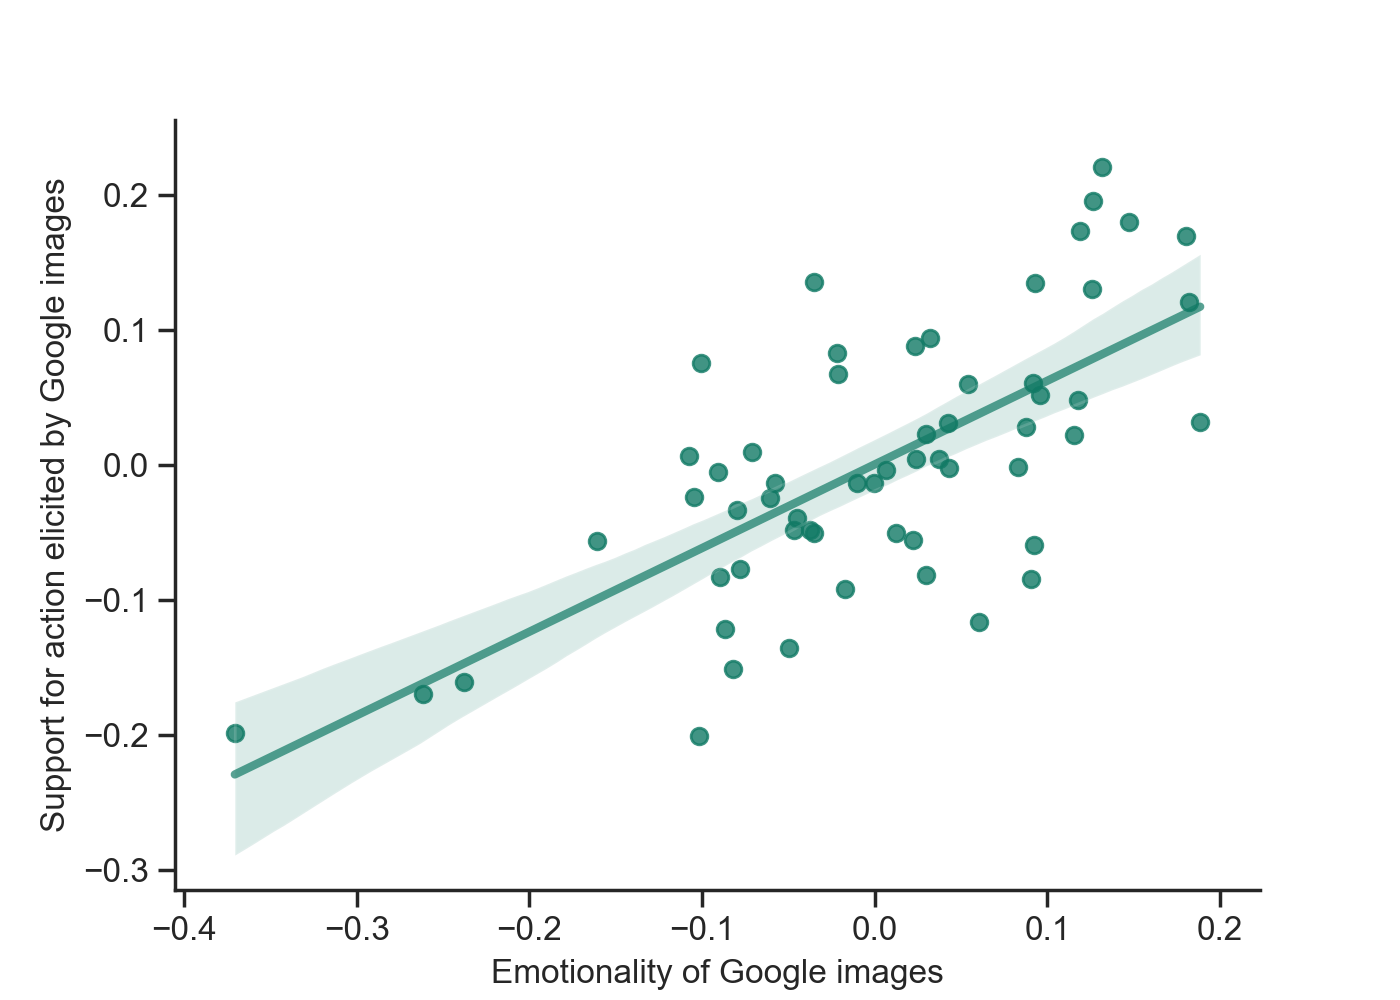

In [16]:
fig, ax = plt.subplots(1,1, figsize=(7,5))

sns.regplot(x=AVDATA.emoRating, y=AVDATA.actRating, scatter_kws={"color": "#117A65"}, \
            line_kws={"color":"#117A65","alpha":0.7,"lw":3}, ax=ax)
ax.set_ylabel('Support for action elicited by Google images')
ax.set(xlabel='Emotionality of Google images')
sns.despine()

In [18]:
import warnings
warnings.filterwarnings('ignore')

# Load R in Python
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [19]:
# Load the R library lmerTest
%R library(lmerTest)

array(['lmerTest', 'lme4', 'Matrix', 'tools', 'stats', 'graphics',
       'grDevices', 'utils', 'datasets', 'methods', 'base'], dtype='<U9')

In [20]:
# Send R the dataset
%Rpush df

In [22]:
%%R

M <- lmer(emoRating ~ perception + (1 | country) + (1 | term) + (1 | ID), data = df)
print(summary(M))

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: emoRating ~ perception + (1 | country) + (1 | term) + (1 | ID)
   Data: df

REML criterion at convergence: 11676.9

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.8025 -0.3654  0.0311  0.4389  5.4966 

Random effects:
 Groups   Name        Variance Std.Dev.
 ID       (Intercept) 0.687317 0.82905 
 country  (Intercept) 0.005435 0.07372 
 term     (Intercept) 0.001448 0.03806 
 Residual             0.298297 0.54617 
Number of obs: 6262, groups:  ID, 388; country, 48; term, 4

Fixed effects:
             Estimate Std. Error        df t value Pr(>|t|)   
(Intercept)  0.003889   0.047910 79.991652   0.081  0.93551   
perception   0.041904   0.012744 46.812240   3.288  0.00192 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
           (Intr)
perception -0.003


In [21]:
%%R

M <- lmer(emoRating ~ perception + epi + CRI + GDP + (1 | country) + (1 | term) + (1 | ID), data = df)
print(summary(M))

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: emoRating ~ perception + epi + CRI + GDP + (1 | country) + (1 |  
    term) + (1 | ID)
   Data: df

REML criterion at convergence: 11466.2

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-5.0950 -0.3633  0.0331  0.4379  5.4954 

Random effects:
 Groups   Name        Variance Std.Dev.
 ID       (Intercept) 0.685904 0.82819 
 country  (Intercept) 0.005532 0.07438 
 term     (Intercept) 0.001237 0.03517 
 Residual             0.298416 0.54627 
Number of obs: 6123, groups:  ID, 388; country, 47; term, 4

Fixed effects:
              Estimate Std. Error         df t value Pr(>|t|)  
(Intercept)   0.041304   0.057653 123.626072   0.716   0.4751  
perception    0.034965   0.014084  42.556210   2.483   0.0171 *
epi           0.008148   0.013679  42.148150   0.596   0.5546  
CRI          -0.000546   0.000474  41.926263  -1.152   0.2559  
GDP           0.012133   0.013637  40.804459   0.89

In [23]:
%%R

M <- lmer(actRating ~ perception + (1 | country) + (1 | term) + (1 | ID), data = df)
print(summary(M))

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: actRating ~ perception + (1 | country) + (1 | term) + (1 | ID)
   Data: df

REML criterion at convergence: 10296.6

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-5.7293 -0.3167  0.0372  0.3977  5.7831 

Random effects:
 Groups   Name        Variance  Std.Dev.
 ID       (Intercept) 0.7483402 0.86507 
 country  (Intercept) 0.0023647 0.04863 
 term     (Intercept) 0.0001374 0.01172 
 Residual             0.2367206 0.48654 
Number of obs: 6241, groups:  ID, 388; country, 48; term, 4

Fixed effects:
             Estimate Std. Error        df t value Pr(>|t|)  
(Intercept) 2.914e-03  4.529e-02 3.493e+02   0.064   0.9487  
perception  2.173e-02  9.433e-03 4.719e+01   2.304   0.0257 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
           (Intr)
perception -0.002


In [14]:
%%R

M <- lmer(actRating ~ perception + epi +  CRI + GDP + (1 | country) + (1 | term) + (1 | ID), data = df)
print(summary(M))

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: actRating ~ perception + epi + CRI + GDP + (1 | country) + (1 |  
    term) + (1 | ID)
   Data: df

REML criterion at convergence: 10125.2

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-5.7071 -0.3180  0.0410  0.3984  5.7915 

Random effects:
 Groups   Name        Variance  Std.Dev.
 ID       (Intercept) 0.7467220 0.86413 
 country  (Intercept) 0.0022099 0.04701 
 term     (Intercept) 0.0000941 0.00970 
 Residual             0.2371173 0.48695 
Number of obs: 6102, groups:  ID, 388; country, 47; term, 4

Fixed effects:
              Estimate Std. Error         df t value Pr(>|t|)  
(Intercept)  2.056e-02  5.093e-02  3.125e+02   0.404   0.6867  
perception   2.452e-02  1.017e-02  4.286e+01   2.410   0.0203 *
epi         -1.804e-02  9.859e-03  4.208e+01  -1.829   0.0744 .
CRI         -2.460e-04  3.414e-04  4.173e+01  -0.721   0.4751  
GDP          3.796e-03  9.798e-03  4.027e+01  

In [15]:
%%R

M <- lmer(actRating ~ emoRating + perception + epi +  CRI + GDP + (1 | country) + (1 | term) + (1 | ID), data = df)
print(summary(M))

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: 
actRating ~ emoRating + perception + epi + CRI + GDP + (1 | country) +  
    (1 | term) + (1 | ID)
   Data: df

REML criterion at convergence: 9345

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-6.0659 -0.3322  0.0307  0.4099  5.8205 

Random effects:
 Groups   Name        Variance  Std.Dev.
 ID       (Intercept) 0.5283094 0.72685 
 country  (Intercept) 0.0006258 0.02502 
 term     (Intercept) 0.0002291 0.01514 
 Residual             0.2158710 0.46462 
Number of obs: 6029, groups:  ID, 388; country, 47; term, 4

Fixed effects:
              Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)  1.111e-02  4.232e-02  2.734e+02   0.263  0.79303    
emoRating    2.987e-01  1.090e-02  5.927e+03  27.399  < 2e-16 ***
perception   1.327e-02  7.765e-03  4.246e+01   1.708  0.09486 .  
epi         -2.075e-02  7.506e-03  4.132e+01  -2.764  0.00849 ** 
CRI         -1.254e-04  2.

In [33]:
mediation_analysis(data=AVDATA, x='perception', m='emoRating', y='actRating', n_boot=10000, alpha=0.05).round(3)

,path,coef,se,pval,CI[2.5%],CI[97.5%],sig
0,emoRating ~ X,0.043,0.015,0.008,0.012,0.074,Yes
1,Y ~ emoRating,0.572,0.093,0.000,0.385,0.759,Yes
2,Total,0.024,0.014,0.080,-0.003,0.052,No
3,Direct,0.000,0.012,0.995,-0.023,0.023,No
4,Indirect,0.024,0.011,0.016,0.004,0.047,Yes


In [32]:
md = smf.ols("emoRating ~ perception", AVDATA)
mdf = md.fit()
print(mdf.summary())

                            OLS Regression Results                            
Dep. Variable:              emoRating   R-squared:                       0.143
Model:                            OLS   Adj. R-squared:                  0.125
Method:                 Least Squares   F-statistic:                     7.702
Date:                Sat, 03 Dec 2022   Prob (F-statistic):            0.00795
Time:                        14:28:14   Log-Likelihood:                 40.007
No. Observations:                  48   AIC:                            -76.01
Df Residuals:                      46   BIC:                            -72.27
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0115      0.016      0.744      0.4

In [31]:
md = smf.ols("actRating ~ emoRating + perception", AVDATA)
mdf = md.fit()
print(mdf.summary())

                            OLS Regression Results                            
Dep. Variable:              actRating   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.427
Method:                 Least Squares   F-statistic:                     18.52
Date:                Sat, 03 Dec 2022   Prob (F-statistic):           1.35e-06
Time:                        14:28:11   Log-Likelihood:                 58.461
No. Observations:                  48   AIC:                            -110.9
Df Residuals:                      45   BIC:                            -105.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0077      0.011      0.719      0.4